In [2]:
# importing the basic libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import gensim

# Twitter Data Scrapping

In [4]:
#!pip install tweepy- installed 

In [5]:
#Twitter developer api keys and access tokens 

consumer_api='jN9X5vWSqhlcLgDmU5x83M7uM'
consumer_api_secret='AMpyJnCAXdQUnKEsQG1P40MEasN59SeMj4IcknpRoAvy9xcXQI'
access_key='1097456175690469377-ZkczCTjTCgZbqwBgXeUOwXJMyFy75N'
access_secret='AlLlEvBA1y8O8O5nsV1K6Yes4FRUFLPuA2xW3sCnW1BQw'

In [7]:
import tweepy
auth=tweepy.OAuthHandler(consumer_key=consumer_api,consumer_secret=consumer_api_secret)# authentication function
auth.set_access_token(access_key,access_secret)

In [8]:
api=tweepy.API(auth_handler=auth,wait_on_rate_limit=True)

In [14]:
tweets=api.user_timeline('narendramodi',count=100)
len(tweets)
tweets[0]

Status(_api=<tweepy.api.API object at 0x0000027757179CC0>, _json={'created_at': 'Wed Feb 20 05:20:53 +0000 2019', 'id': 1098090090251710464, 'id_str': '1098090090251710464', 'text': 'हिन्दी साहित्य के शिखर पुरुष नामवर सिंह जी के निधन से गहरा दुख हुआ है। उन्होंने आलोचना के माध्यम से हिन्दी साहित्य… https://t.co/hCapGjZCE8', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/hCapGjZCE8', 'expanded_url': 'https://twitter.com/i/web/status/1098090090251710464', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Narendra Modi', 'screen_name': 'narendramodi', 'location': 'India', 'description': 'Prime Minister of Indi

In [55]:
#to search user tweets
tweets_det=pd.DataFrame()
for page in range(1,20):
    tweets=api.user_timeline('Ranjith163',count=200,page=page)
    for t in tweets:
        curr_tweet={
        'text':t.text,
        'created_at':t.created_at,
        'retweets':t.retweet_count,
        'likes':t.favorite_count,
        'source':t.source,
        'location':t.geo,
        'prof_loc':t.user.location,
        'prof_name':t.user.name,
        'prof_desc':t.user.description}
        tweets_det=tweets_det.append(curr_tweet,ignore_index=True)
        

In [56]:
tweets_det.shape

(3140, 9)

In [57]:
modi_tweets_scraped=tweets_det.to_csv('Ranjith_tweets.csv',index=False)

In [35]:
from wordcloud import WordCloud

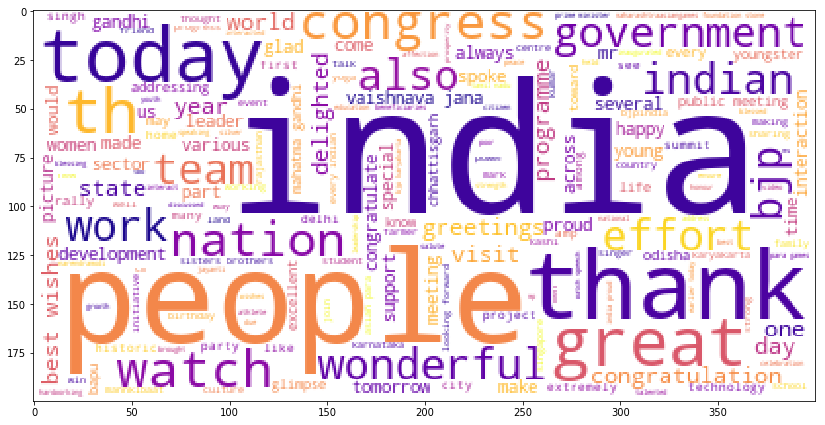

In [43]:
plt.figure(figsize=[14,12])
text=' '.join(tweets_det['text'].str.lower().str.replace('[^a-z ]',''))
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['https','rt','co','ji','shri'])
wc=WordCloud(background_color='white',colormap='plasma',stopwords=stopwords).generate(text)
plt.imshow(wc)

## Search tweets based on search term/ hashtag

In [51]:
#to search hashtag/ term tweets
tweets_det=pd.DataFrame()
tweets=api.search('#amazon',count=1000,lang='english')
for t in tweets:
    curr_tweet={
    'text':t.text,
    'created_at':t.created_at,
    'retweets':t.retweet_count,
    'likes':t.favorite_count,
    'source':t.source,
    'location':t.geo,
    'prof_loc':t.user.location,
    'prof_name':t.user.name,
    'prof_desc':t.user.description}
    tweets_det=tweets_det.append(curr_tweet,ignore_index=True)

In [52]:
tweets_det.shape

(0, 0)

In [53]:
tweets_det.head(10)

""


In [54]:
import os 
os.getcwd()

'C:\\Users\\HII\\Desktop\\Text Mining\\10 Text Mining\\day1'

In [59]:
import glob
glob.glob('*.py')

['Twitter_streaming_api.py']

# Web Scraping

In [61]:
#!pip install selenium-testing tool installed

In [62]:
os.getcwd()

'C:\\Users\\HII\\Desktop\\Text Mining\\10 Text Mining\\day1'

In [141]:
# automated testing software
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome('chromedriver.exe')


In [65]:
driver.get('https://google.com') # to launch Google with selenium

In [66]:
driver.get('https://en.wikipedia.org/wiki/Topic_model')

In [68]:
ptags=driver.find_elements_by_css_selector('p')
len(ptags)

10

In [70]:
# getting the paragraph of any article
for tag in ptags:
    print(tag.text) # tag.get_attribute('innerHTML')
    print('-------------------------------------')

Wiki Loves Love: Documenting festivals and celebrations of love on Commons.
Help Wikimedia and win prizes by sending photos.
-------------------------------------
In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by to

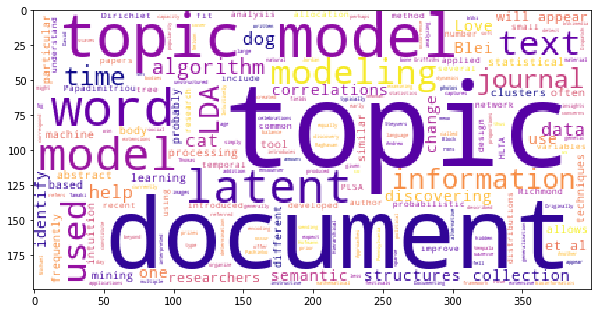

In [73]:
plt.figure(figsize=[10,8])
article=' '.join(para.text for para in ptags)
wc=WordCloud(background_color='white',colormap='plasma').generate(article)
plt.imshow(wc)

In [142]:
url='https://bit.ly/2twaRXz'
driver.get(url)

In [143]:
res_tags=driver.find_elements_by_css_selector('div.h100.pb20')
len(res_tags)

150

In [144]:
#Get the restruant details in the page
rest=pd.DataFrame()
for res in res_tags:
  
    title=res.find_element_by_css_selector('div.res_title')
    title=title.get_attribute('title') 
    location=res.find_element_by_css_selector('div.nowrap.grey-text.fontsize5.ttupper')
    location=location.text
    Cusine=res.find_element_by_css_selector('div.ptop0.pbot0.pl10.pr10')
    Cusine=Cusine.find_elements_by_css_selector('div')[2].text,
    Rating=res.find_element_by_css_selector('div[data-res-id]').text
    
    try:
        url=res.find_element_by_css_selector('a[data-link-type="restaurant"]')   
        url= url.get_attribute('href')  
    except:
        url=None
    #print(title,location,Cusine,Rating,url)         
    res={'Resturant_Name':title,'Location':location,'Cusine':Cusine,'Rating':Rating,'URL':url}
    rest=rest.append(res,ignore_index=True)
   

In [148]:
rest.shape

(150, 5)

In [149]:
rest.tail()

,Cusine,Location,Rating,Resturant_Name,URL
145,"(Ice Cream, Desserts,)",7 OUTLETS ›,Corner House Ice Cream\n7 OUTLETS ›\nIce Cream...,Corner House Ice Cream,None
146,"(Continental, North Indian, Chinese,)","RAJAJINAGAR, BANGALORE","4.6\nStories\nRAJAJINAGAR, BANGALORE\nContinen...",Stories,https://www.zomato.com/bangalore/stories-rajaj...
147,"(Cafe, Continental, Burger,)","BTM, BANGALORE","4.5\nMudpipe Cafe\nBTM, BANGALORE\nCafe, Conti...",Mudpipe Cafe,https://www.zomato.com/bangalore/mudpipe-cafe-...
148,"(South Indian,)","HSR, BANGALORE","4.7\nArogya Ahaara\nHSR, BANGALORE\nSouth Indian",Arogya Ahaara,https://www.zomato.com/bangalore/arogya-ahaara...
149,"(North Indian, Chinese, Continental, Thai, Sal...","BLUPETAL HOTEL, KORAMANGALA, BANGALORE","4.5\nBuff Buffet Buff\nBLUPETAL HOTEL, KORAMAN...",Buff Buffet Buff,https://www.zomato.com/bangalore/buff-buffet-b...


In [158]:
# taking review for a particular resturant
reviews=pd.DataFrame()
for i,r in rest.head(1).iterrows():
    if not pd.isnull(r['URL']):
        print(r['URL'])
        driver.get(r['URL'])
        rev_tags=driver.find_elements_by_css_selector('div.ui.segment.clearfix.brtop')
        rev_tags1=driver.find_elements_by_css_selector('div.ui.segment.clearfix.br0')
        rev_tags.extend(rev_tags1)
        for rev in rev_tags:
            rev_name=rev.find_element_by_css_selector('a[data-entity_id]').text
            no_rev=rev.find_element_by_css_selector('span.grey-text.fontsize5.nowrap').text
            try:
                
                review=rev.find_element_by_css_selector('div.rev-text')
                text=review.text
                rating=review.find_element_by_css_selector('div').get_attribute('aria-label')
                review=rev.find_element_by_css_selector('div.rev-text-expand')
                text=review.text
                #reviews.append(review1)
            except:
                review=''
            rev={'User':rev_name,'Resturant':r['Resturant_Name'],'Review_Text':text,'Rating':rating}        
                #review1=rev.find_element_by_css_selector('div.rev-text-expand').text
                #reviews.append(review)
                #reviews.append(review1)
            #print(rev_name,no_rev,text,rating)
            #print('========')
            reviews=reviews.append(rev,ignore_index=True)    
    

https://www.zomato.com/bangalore/baar-union-hsr-bangalore?zrp_bid=235837&zrp_pid=14&zrp_cid=326103&context=eyJjIjp7ImUiOlsxODg4MTc5OCwiMTg0OTI5MTAiLCIxODU4NjIwNyIsIjE4Nzg1NzY5IiwiMTg3ODM1MjciLCI1NTkwOCIsIjE4MjU0NTk3IiwiMTgyNzAxNjMiLCIxODY2MTA5NCIsIjU0NTAzIiwiMTg4Nzg2NzEiXSwidCI6IkJlbmdhbHVydSYjMDM5O3MgRmluZXN0ICJ9fQ==


In [159]:
reviews.head(20)

,Rating,Resturant,Review_Text,User
0,Rated 5.0,Baar Union,RATED\n Last Saturday was a rocking night her...,Shashi UH. @food.clickz
1,Rated 3.0,Baar Union,"RATED\n Another bar in HSR, with wall murals,...",Akhil Khandeparkar
2,Rated 4.0,Baar Union,"RATED\n BAAR UNION, located in HSR layout is ...",Suraj ( Bangalore Foodtales )
3,Rated 4.0,Baar Union,RATED\n A place for bollywood lovers to have ...,Mohammed Younus
4,Rated 3.0,Baar Union,RATED\n I would rate this place a 3.5 (.5 for...,Mayuri Bansal
5,Rated 3.0,Baar Union,RATED\n Pub serves really good food. We had a...,Moumita Pal
6,Rated 3.0,Baar Union,RATED\n Good for drinks but not for food. Int...,Neeraj Pandey
7,Rated 5.0,Baar Union,RATED\n It’s an excellent place to be with fr...,Siddharth Taneja
8,Rated 5.0,Baar Union,RATED\n Baar Union :- located at HSR is one o...,Beardofoodie
9,Rated 5.0,Baar Union,RATED\n One of the coolest hangout places in ...,Jobin John
